In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from joblib import dump, load

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## Importing data and preparing it for ML

In [46]:
#import cleaned data
df = pd.read_csv("../Data/AB_data_clean.csv")
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,neighbourhood_other,neighbourhood_other_label,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,Other,29,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,Midtown,25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [47]:
df_joined = pd.read_csv("../Data/joined_data.csv")
df_joined = df_joined.drop(['Unnamed: 0'], axis=1)
df_joined.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,room_type_Shared room,number_of_places_2500m,number_of_places_1000m,number_of_places_500m,number_of_rats_2500m,number_of_rats_1000m,number_of_rats_500m,number_of_trees_2500m,number_of_trees_1000m,number_of_trees_500m
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,0.0,8,0,0,456,57,8,5491,1037,321
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,0.0,75,29,4,448,54,5,3611,296,46


In [48]:
df['last_review'] = df['last_review'].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

df_joined['last_review'] = df_joined['last_review'].fillna(0)
df_joined['reviews_per_month'] = df_joined['reviews_per_month'].fillna(0)

## Random forest for prediction on the website

In [49]:
features_web = df.drop(['price',
                        'id', 
                        'name', 
                        'host_id', 
                        'host_name', 
                        'neighbourhood_group',
                        'neighbourhood', 
                        'room_type',
                        'last_review',
                        'neighbourhood_other',
                        'reviews_per_month',
                        'neighbourhood_other_label',
                        'neighbourhood_group_Bronx',
                        'neighbourhood_group_Brooklyn',
                        'neighbourhood_group_Manhattan', 
                        'neighbourhood_group_Queens',
                        'neighbourhood_group_Staten Island'], axis=1)

target = df.price

print(features_web.columns)

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')


In [50]:
test_fraction = 0.2

# This is a stratified split:
X_train, X_test, y_train, y_test = train_test_split(features_web, target, test_size = test_fraction, random_state=3546)
#Display how many samples are chosen for training and test, respectively
print('Training Features Shape:', X_train.shape,'\tTesting Features Shape:\t', X_test.shape)
print('Training Labels Shape:\t', y_train.shape, '\tTesting Labels Shape:\t', y_test.shape)

Training Features Shape: (38970, 9) 	Testing Features Shape:	 (9743, 9)
Training Labels Shape:	 (38970,) 	Testing Labels Shape:	 (9743,)


In [51]:
parameters = {'n_estimators':[150,], 'criterion':('mse',), 'max_depth':[10,]} # Found to be the best in the explainer notebook

reg_forest_web = RandomForestRegressor(random_state=3546) # random state is set so as to guarantee the same outcome every time
reg_seach = GridSearchCV(reg_forest_web, parameters, scoring='neg_mean_absolute_error', refit=True, )#verbose=4)

reg_seach.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=3546),
             param_grid={'criterion': ('mse',), 'max_depth': [10],
                         'n_estimators': [150]},
             scoring='neg_mean_absolute_error')

In [52]:
reg_forest_web_best = reg_seach.best_estimator_
y_pred = reg_forest_web_best.predict(X_test)

print(f'Mean absolute error (on test data): {round(mean_absolute_error(y_test, y_pred),4)}')

Mean absolute error (on test data): 68.7354


In [53]:
dump(reg_forest_web_best, 'model_forest_web.joblib')

['model_forest_web.joblib']

## Random forests for plots on slide 8

In [54]:
#chose which featues not to include in the calculation
features_AB = df.drop(['price',
                        'id', 
                        'name', 
                        'host_id', 
                        'host_name', 
                        'neighbourhood_group',
                        'neighbourhood', 
                        'room_type',
                        'last_review',
                        'neighbourhood_other'], axis=1)

features_joined = df_joined.drop(['price',
                    'id', 
                    'name', 
                    'host_id', 
                    'host_name', 
                    'neighbourhood_group',
                    'neighbourhood', 
                    'room_type',
                    'last_review',
                    'neighbourhood_other'], axis=1)

target_AB = df.price
target_joined = df_joined.price


print(features_AB.columns)
print(features_joined.columns)

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_other_label',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')
Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_other_label',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'number_of_places_2500m', 'number_of_places_1000m',
  

In [55]:
test_fraction = 0.2

X_train_AB, X_test_AB, y_train_AB, y_test_AB = train_test_split(features_AB, target_AB, test_size = test_fraction, random_state=3546)
X_train_joined, X_test_joined, y_train_joined, y_test_joined = train_test_split(features_joined, target_joined, test_size = test_fraction, random_state=3546)

In [56]:
parameters = {'n_estimators':[200,], 'criterion':('mse',), 'max_depth':[10,]} # Found to be the best in the explainer notebook

reg_forest_AB = RandomForestRegressor(random_state=3546) # random state is set so as to guarantee the same outcome every time
reg_seach = GridSearchCV(reg_forest_AB, parameters, scoring='neg_mean_absolute_error', refit=True, )#verbose=4)

reg_seach.fit(X_train_AB, y_train_AB)
reg_forest_AB_best = reg_seach.best_estimator_

In [57]:
parameters = {'n_estimators':[200,], 'criterion':('mse',), 'max_depth':[10,]} # Found to be the best in the explainer notebook

reg_forest_joined = RandomForestRegressor(random_state=3546) # random state is set so as to guarantee the same outcome every time
reg_seach = GridSearchCV(reg_forest_joined, parameters, scoring='neg_mean_absolute_error', refit=True, )#verbose=4)

reg_seach.fit(X_train_joined, y_train_joined)
reg_forest_joined_best = reg_seach.best_estimator_

In [58]:
y_pred_AB = reg_forest_AB_best.predict(X_test_AB)
y_pred_joined = reg_forest_joined_best.predict(X_test_joined)


print(f'AB: \t Mean absolute error (on test data): {round(mean_absolute_error(y_test_AB, y_pred_AB),4)}')
print(f'Joined: \t Mean absolute error (on test data): {round(mean_absolute_error(y_test_joined, y_pred_joined),4)}')

AB: 	 Mean absolute error (on test data): 68.6235
Joined: 	 Mean absolute error (on test data): 69.0997


In [59]:
dump(reg_forest_AB_best, 'model_forest_AB.joblib')
dump(reg_forest_joined_best, 'model_forest_joined.joblib')

['model_forest_joined.joblib']

In [62]:
plot_data1 = pd.Series(reg_forest_AB_best.feature_importances_, index=features_AB.columns).nlargest(30)
plot_data2 = pd.Series(reg_forest_joined_best.feature_importances_, index=features_joined.columns).nlargest(30) 

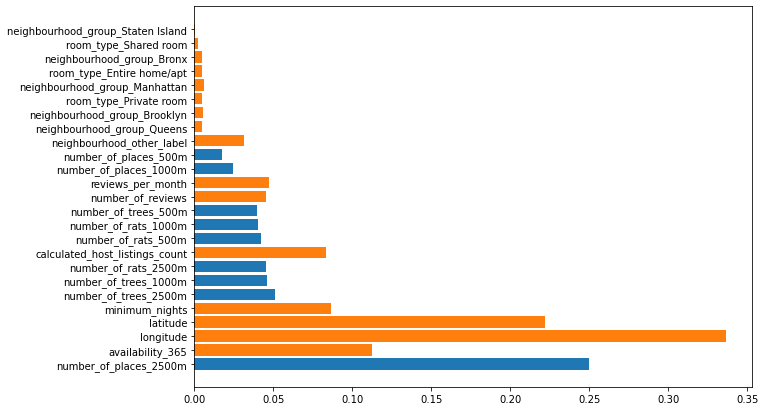

In [63]:
plt.figure(figsize=(10,7))
plt.barh(y = plot_data2.index, width=plot_data2.values)
plt.barh(y = plot_data1.index, width=plot_data1.values)

plt.show()